In [1]:
# Importing Libs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12, 7]

In [3]:
df = pd.read_csv('../enc_devs_py.csv')

In [4]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# GENERO 

- GENERAL

In [5]:
df['Género'].shape

(342,)

In [6]:
df['Género'].isna().sum()

8

In [7]:
df['Género'].value_counts()

Hombre                   279
Mujer                     49
Prefiero no compartir      3
Otros                      2
Género                     1
Name: Género, dtype: int64

In [8]:
df['Género'].replace({
    'Prefiero no compartir':'ND',
    'Otros':'ND',
    'Género':'ND',
},inplace=True)

In [9]:
df['Género'].value_counts()

Hombre    279
Mujer      49
ND          6
Name: Género, dtype: int64

In [10]:
df['Género'].value_counts(normalize=True)

Hombre    0.835329
Mujer     0.146707
ND        0.017964
Name: Género, dtype: float64

<AxesSubplot:title={'center':'GENERO'}>

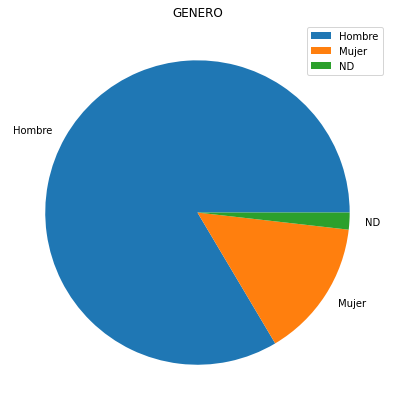

In [11]:
df['Género'].value_counts(normalize=True).plot(kind='pie', title='GENERO', ylabel='', legend=True)

- GENERO POR EDADES

In [12]:
edades = [i for i in df['Edad actual '].value_counts().keys()]

edades_agrupadas = df.groupby('Edad actual ')
edades


['30 a 34 años',
 '25 a 29 años',
 '35 a 39 años',
 '20 a 24 años',
 '40 a 44 años',
 '15 a 19 años',
 '55 a 59 años',
 '45 a 49 años',
 '50 a 54 años']

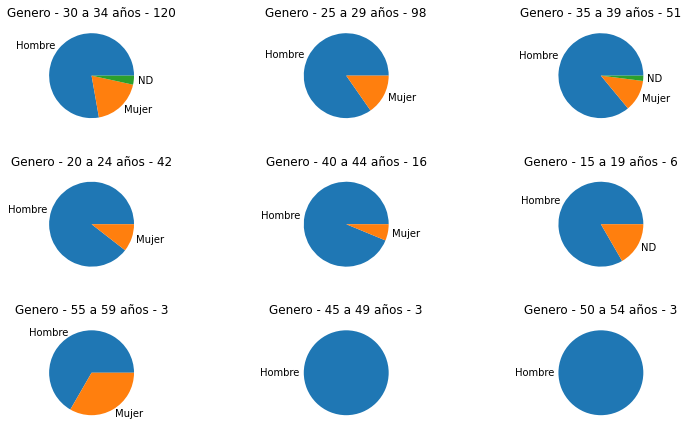

In [25]:
plt.figure() 


for k,v in enumerate(edades):
    plt.subplot(3,3,k+1)
    edades_agrupadas.get_group(v)['Género'].value_counts(normalize=True).plot(
            kind='pie', title='Genero - {0} - {1}'.format(v, edades_agrupadas.get_group(v)['Género'].shape[0]), ylabel='')





plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

In [29]:
for k,v in enumerate(edades):
    print('Genero - {0} - {1} \n {2} \n =============================================='.format(v, edades_agrupadas.get_group(v)['Género'].shape[0],edades_agrupadas.get_group(v)['Género'].value_counts(normalize=True)))



Genero - 30 a 34 años - 120 
 Hombre    0.777778
Mujer     0.188034
ND        0.034188
Name: Género, dtype: float64 
Genero - 25 a 29 años - 98 
 Hombre    0.846939
Mujer     0.153061
Name: Género, dtype: float64 
Genero - 35 a 39 años - 51 
 Hombre    0.86
Mujer     0.12
ND        0.02
Name: Género, dtype: float64 
Genero - 20 a 24 años - 42 
 Hombre    0.894737
Mujer     0.105263
Name: Género, dtype: float64 
Genero - 40 a 44 años - 16 
 Hombre    0.9375
Mujer     0.0625
Name: Género, dtype: float64 
Genero - 15 a 19 años - 6 
 Hombre    0.833333
ND        0.166667
Name: Género, dtype: float64 
Genero - 55 a 59 años - 3 
 Hombre    0.666667
Mujer     0.333333
Name: Género, dtype: float64 
Genero - 45 a 49 años - 3 
 Hombre    1.0
Name: Género, dtype: float64 
Genero - 50 a 54 años - 3 
 Hombre    1.0
Name: Género, dtype: float64 



- GENERO POR PROFESION

In [14]:
generos = df.groupby('Género')

 - HOMBRES

In [15]:
hombres_df = generos.get_group('Hombre')

In [16]:
trabajos_hombres = {}
def set_trabajos_hombres(work):
    if(isinstance(work, str)):
        for i in work.split(';'):
            trabajos_hombres[i]=0
def count_trabajos_hombres(work):
    if(isinstance(work, str)):
        for i in work.split(';'):
            trabajos_hombres[i]+=1
            


In [17]:
hombres_df['Tipo de trabajo'].map(set_trabajos_hombres)
hombres_df['Tipo de trabajo'].map(count_trabajos_hombres)

7      None
9      None
11     None
12     None
14     None
       ... 
336    None
337    None
338    None
339    None
341    None
Name: Tipo de trabajo, Length: 279, dtype: object

In [18]:
df_trabajos_hombres = pd.DataFrame(data=[i for i in trabajos_hombres.items()], columns=['trabajo', 'count'])
df_trabajos_hombres

,trabajo,count
0,Desarrollador back-end,121
1,Desarrollador full-stack,142
2,Desarrollador front-end,87
3,Aplicaciones de escritorio o empresariales,62
4,Administrador de base de datos,61
5,Desarrollador mobile,49
6,Desarrollador de sistemas embebidos,20
7,Project Leader,53
8,QA o testing,23
9,Desarrollador de videojuegos,3


- Mujeres

In [19]:
mujeres_df = generos.get_group('Mujer')

In [20]:
trabajos_mujeres = {}
def set_trabajos_mujeres(work):
    if(isinstance(work, str)):
        for i in work.split(';'):
            trabajos_mujeres[i]=0
def count_trabajos_mujeres(work):
    if(isinstance(work, str)):
        for i in work.split(';'):
            trabajos_mujeres[i]+=1
            

In [21]:
mujeres_df['Tipo de trabajo'].map(set_trabajos_mujeres)
mujeres_df['Tipo de trabajo'].map(count_trabajos_mujeres)

13     None
52     None
70     None
80     None
109    None
112    None
113    None
121    None
130    None
131    None
153    None
157    None
164    None
168    None
169    None
198    None
201    None
205    None
213    None
214    None
216    None
218    None
219    None
221    None
228    None
230    None
231    None
235    None
237    None
252    None
264    None
271    None
274    None
276    None
278    None
286    None
289    None
293    None
294    None
295    None
299    None
302    None
304    None
305    None
310    None
313    None
323    None
335    None
340    None
Name: Tipo de trabajo, dtype: object

In [22]:
df_trabajos_mujeres = pd.DataFrame(data=[i for i in trabajos_mujeres.items()], columns=['trabajo', 'count'])
#df_trabajos_mujeres.append(['Desarrollador de videojuegos',0],ignore_index=True)
df_trabajos_mujeres.loc[9] = ['Desarrollador de videojuegos',0 ]
df_trabajos_mujeres

,trabajo,count
0,Desarrollador back-end,12
1,Desarrollador front-end,12
2,Desarrollador full-stack,14
3,Desarrollador mobile,5
4,Project Leader,7
5,QA o testing,9
6,Desarrollador de sistemas embebidos,3
7,Aplicaciones de escritorio o empresariales,13
8,Administrador de base de datos,10
9,Desarrollador de videojuegos,0


# ROLES HOMBRES VS MUJERES

<AxesSubplot:>

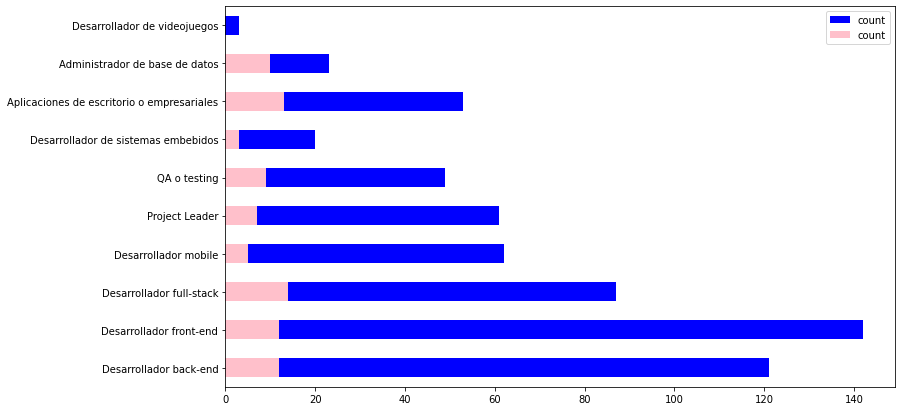

In [23]:
ax = df_trabajos_hombres.set_index('trabajo').plot(kind='barh',color='blue')
df_trabajos_mujeres.set_index('trabajo').plot(kind='barh',color='pink',ax=ax, xlabel='')